통계 파일로부터 저장된 csv 파일 불러다가 플롯 그리는 역할.

In [1]:
# 사전 변수
csv_dir = '/home/hschoi/leehyunwon/ECG-SNN/new_server/ver6/statistics/tensorboard_to_pandas/channel.csv'
savefile_name = 'channel_boxplot_regression.pdf'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



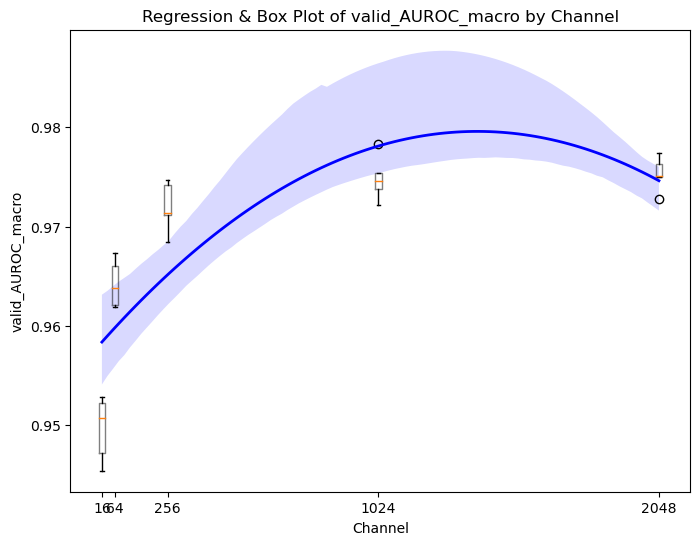

In [8]:
# CSV 파일 불러오기
data = pd.read_csv(csv_dir)

# 1. 폴더명에서 'channel_xx' 추출하여 x축 값 추가
def extract_channel(source_dir):
    if "channel_" in source_dir:
        # 'channel_' 뒤의 값을 추출
        channel_value = int(source_dir.split("channel_")[1].split("_")[0])
        return channel_value
    return 1024

data['channel'] = data['source_dir'].apply(extract_channel)

# 2. 폴더명에서 시간 기록(yyyy-mm-dd-hh-mm-ss)을 추출하여 그룹화 키 추가
def extract_time_key(source_dir):
    return "-".join(source_dir.split("_")[:-2])

data['time_key'] = data['source_dir'].apply(extract_time_key)

# 얘도 일단 2048은 너무 머니까 빼자.
# data = data[data['channel'] != 2048] # 일단 보류

# 플롯그리기

metrics = ["valid_AUROC_macro"]

for metric in metrics:
    plt.figure(figsize=(8, 6))

    # x축의 실제 숫자값 순서대로 정렬
    unique_channels = sorted(data['channel'].unique())

    # 실제 숫자 위치에 박스플롯 그리기 (matplotlib 활용)
    boxplot_data = [data[data['channel'] == channel][metric] for channel in unique_channels]
    plt.boxplot(
        boxplot_data,
        positions=unique_channels,
        widths=np.min(np.diff(unique_channels)) * 0.5,  # x 간격의 절반 너비
        boxprops=dict(alpha=0.5)
    )

    # regplot 추가 (회귀선만)
    sns.regplot(
        data=data,
        x="channel",
        y=metric,
        scatter=False,
        ci=95,
        order=2,
        line_kws={'color':'blue', 'linewidth':2}
    )

    plt.xlabel("Channel")
    plt.ylabel(metric)
    plt.title(f"Regression & Box Plot of {metric} by Channel")

    plt.savefig(savefile_name, format="pdf", bbox_inches="tight")
    plt.show()

plt.close()